# EDA

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# df=pd .read_csv('titanic.csv')
# df.head()
# load titanic dataset from seaborn
df = sns.load_dataset('titanic')
# display first 5 rows
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
# check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Fill missing 'age' with median
df['age'].fillna (df['age'].median(),inplace=True)
# why median ? not mean or anything ? bec data can have outliers
# Fill missing 'embark_town' with most frequent value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# for catogorical data
# Drop 'deck'column (too many missing values)
df.drop(columns=['deck'], inplace=True)
# Verify missing values
df.isnull().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\495552652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna (df['age'].median(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\495552652.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
# check duplicates
print("duplicates:", df.duplicated().sum())


duplicates: 116


In [11]:


df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
55,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
76,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [14]:
# check duplicates
print("duplicates:", df.duplicated().sum())


duplicates: 116


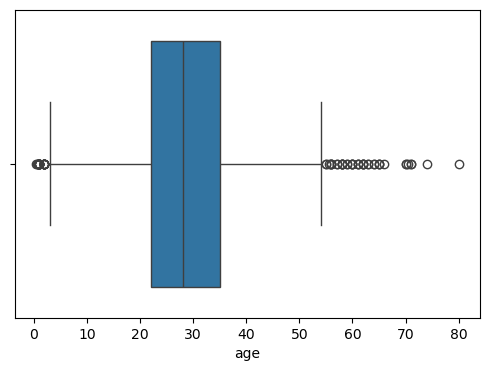

In [13]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

In [16]:
# Remove outliers using IQR method 
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR=Q3-Q1
lower= Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['age']>=lower)&(df['age']<=upper)]


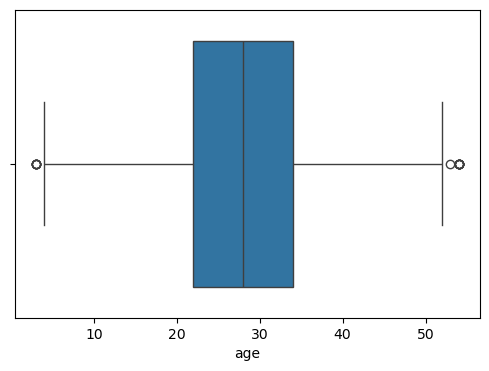

In [17]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

In [ ]:
# Create a new column 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1
# Create a new column 'family_'

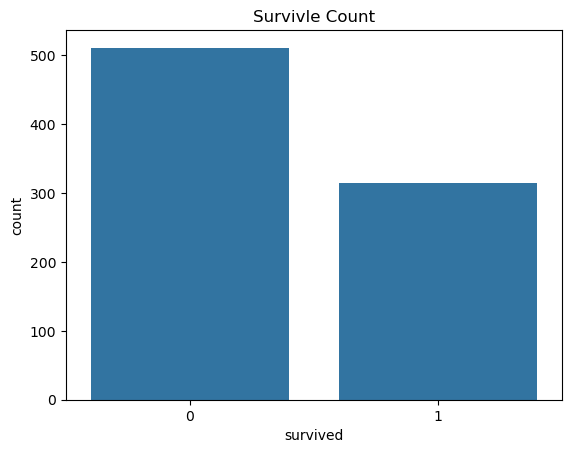

In [18]:
# Countplot of survivors
sns.countplot(x='survived',data=df)
plt.title("Survivle Count")
plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'show'

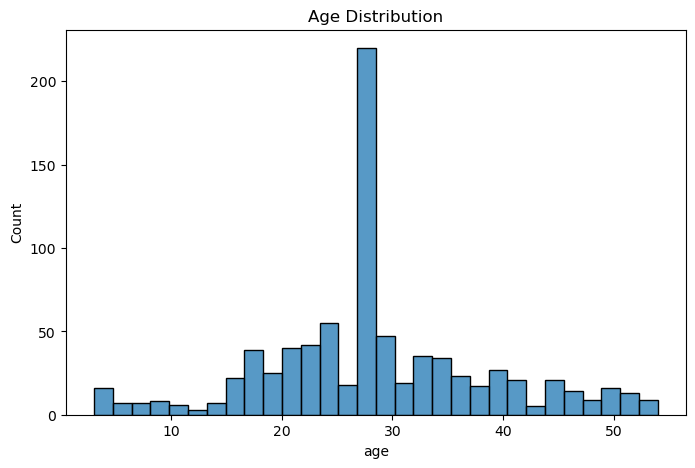

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30)
plt.title("Age Distribution")
print.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'show'

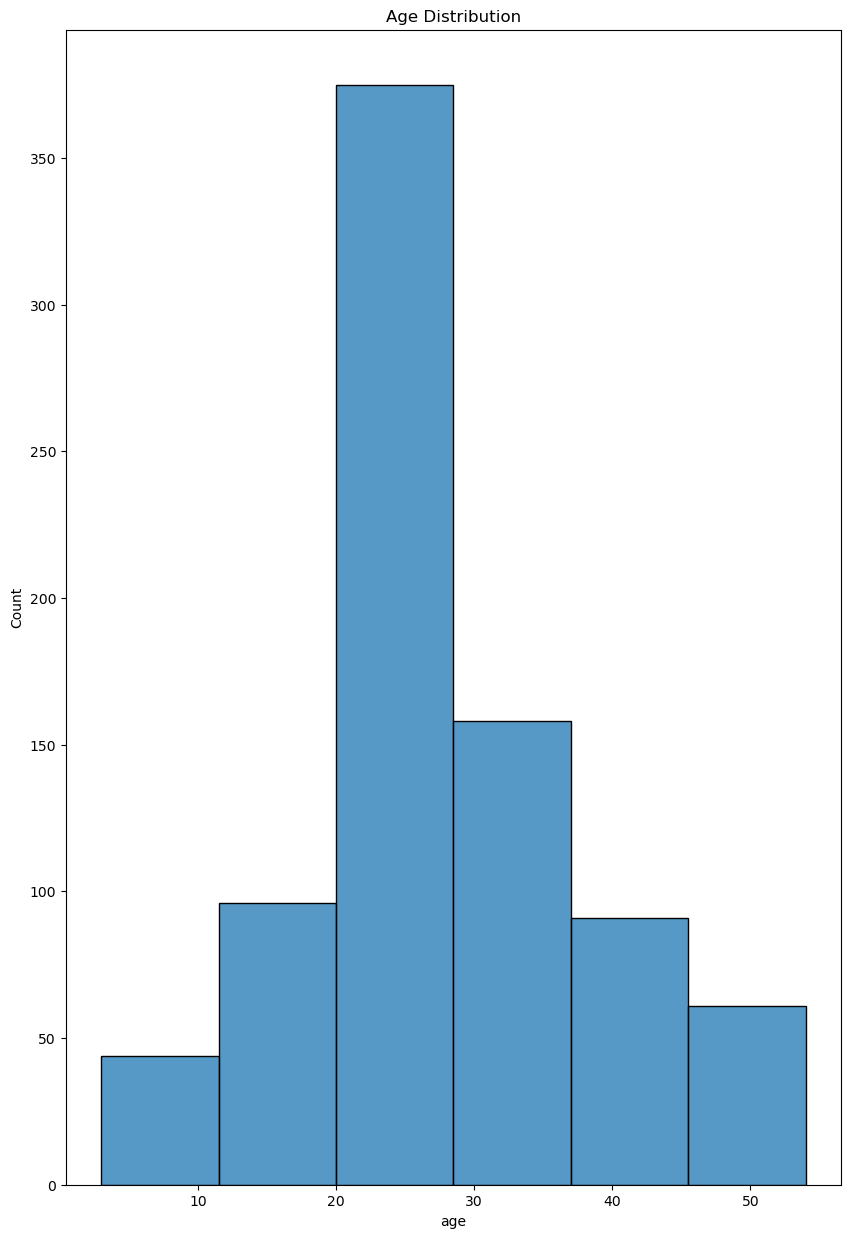

In [23]:
plt.figure(figsize=(10,15))
b=6
sns.histplot(df['age'], bins=6)
plt.title("Age Distribution")
print.show()


for c,bs,be in zip(df['age'],bins,bin edges[::-1],bin_edge[1:]):
    bin_label=f"{int(bs)} - {int(be)}"
    ax.text((bs+be) / 2, count + 1, bin_label,ha='center',frontsize=10, color='black')